In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time

1. Генерация точек

In [17]:
def generate_point_cloud(n_points: int, seed: int | None = None) -> np.ndarray:
    """
    Генерация 3D облака точек в кубе [0,1]^3
    """
    rng = np.random.default_rng(seed)
    return rng.random((n_points, 3))

In [22]:
points = generate_point_cloud(n_points=1_000, seed=42)
print("Сгенерировано синтетическое облако:", points.shape)

Сгенерировано синтетическое облако: (1000, 3)


2. Назначение цветов

In [9]:
def color_from_coordinates(points: np.ndarray) -> np.ndarray:
    """
    Цвет точки задаётся координатами:
    R = X, G = Y, B = Z
    """
    return points.copy()

3. Визуализация в 2D (Matplotlib)

In [14]:
def plot_2d(points: np.ndarray, colors: np.ndarray, title: str):
    """
    2D визуализация (XY) с помощью Matplotlib
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors, s=10)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.grid(True)
    plt.show()

4. Визуализация в 3D (Plotly)

In [15]:
def plot_3d(points: np.ndarray, colors: np.ndarray, title: str):
    """
    3D визуализация с помощью Plotly
    """
    rgb = [
        f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
        for r, g, b in colors
    ]

    fig = go.Figure(
        data=[
            go.Scatter3d(
                x=points[:, 0],
                y=points[:, 1],
                z=points[:, 2],
                mode="markers",
                marker=dict(size=3, color=rgb)
            )
        ]
    )

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z"
        )
    )

    fig.show()

*. Выводы

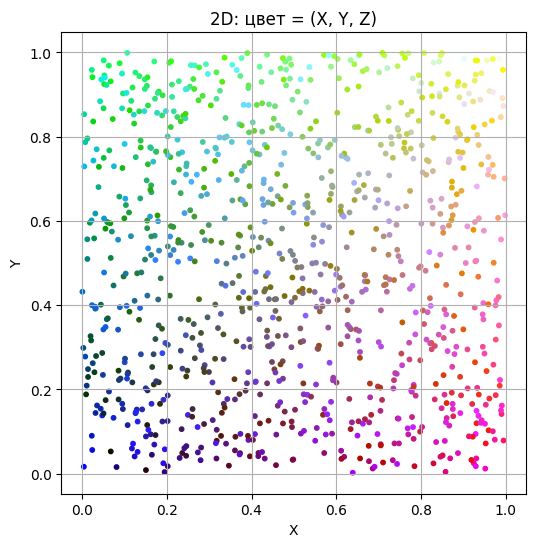

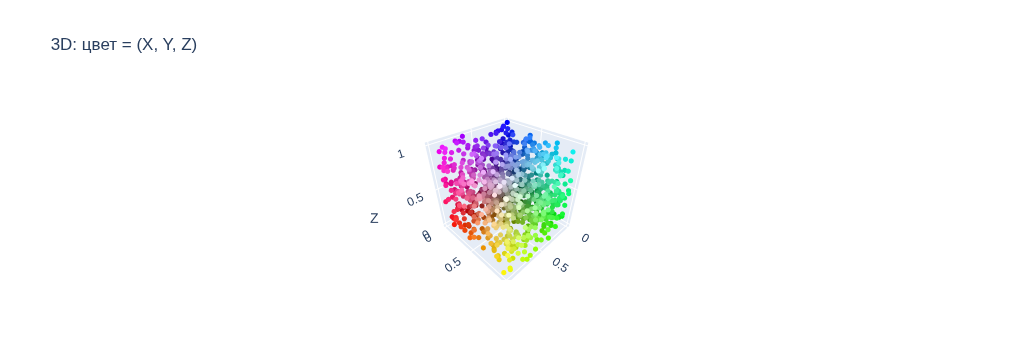

In [21]:
colors_xyz = color_from_coordinates(points)

plot_2d(points, colors_xyz, "2D: цвет = (X, Y, Z)")
plot_3d(points, colors_xyz, "3D: цвет = (X, Y, Z)")